In [6]:
import temp as tp

In [8]:
%run temp

hello world!


In [9]:
prices('SPY','1-1-2000','1-1-2002')

date
2000-01-03    96.493223
2000-01-04    92.719745
2000-01-05    92.885612
2000-01-06    91.392808
2000-01-07    96.700557
                ...    
2001-12-24    77.919884
2001-12-26    78.347752
2001-12-27    78.823161
2001-12-28    78.782413
2001-12-31    77.627845
Name: adjClose, Length: 500, dtype: float64

In [10]:
returns('SPY','1-1-2000','1-1-2002')

NameError: name 'returns' is not defined

In [11]:
import sharpe_ratio_finder as sharpe

hello world!


In [12]:
tickers = ['SPY','TSLA']
start_date = ['1-1-2013']
end_date = ['1-1-2022']

In [15]:
r = sharpe.returns(tickers,start_date,end_date)

In [16]:
risk_premiums = sharpe.rp(tickers,start_date,end_date)
risk_premiums


SPY     0.15269
TSLA    0.70156
dtype: float64

In [17]:
volatility = sharpe.vol(tickers,start_date,end_date)
volatility

SPY     0.164297
TSLA    0.559628
dtype: float64

In [18]:
covariance = sharpe.cov(tickers,start_date,end_date)
covariance

,SPY,TSLA
SPY,0.026993,0.036419
TSLA,0.036419,0.313184


In [19]:
correlation = sharpe.corr(tickers,start_date,end_date)
correlation

,SPY,TSLA
SPY,1.000000,0.396095
TSLA,0.396095,1.000000


<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

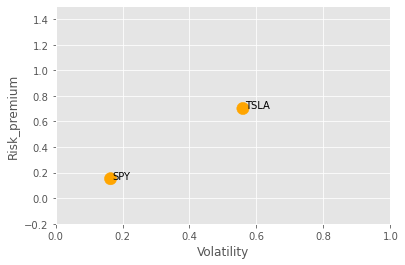

In [25]:
xmax = 1
ymin = -.2
ymax = 1.5
sharpe.mean_vol_plot(tickers,risk_premiums,volatility,xmax,ymin,ymax)

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

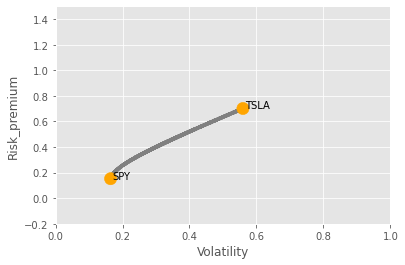

In [27]:
sharpe.efficient_frontier(tickers,risk_premiums,volatility,covariance,xmax,ymin,ymax)

In [28]:
sharpe.max_sharpe_weights(tickers,risk_premiums,volatility,covariance)

,Risk_Premiums,Weights,weighted_ret
SPY,0.15269,0.625882,0.095566
TSLA,0.70156,0.374118,0.262466


In [29]:
sharpe.sharpe_ratio_value(tickers,risk_premiums,volatility,covariance)

1.3393013417822681

In [30]:
sharpe.max_sharpe_risk_premium(tickers,risk_premiums,volatility,covariance)

196    0.35858
Name: Risk_premium, dtype: float64

In [31]:
sharpe.max_sharpe_volatility(tickers,risk_premiums,volatility,covariance)

69    0.26804
Name: Volatility, dtype: float64

In [83]:
def var_weight_plot(base_tickers,var_ticker,base_weights,start_date,end_date,n):
    base_weights = np.array(base_weights)
    
    
    base_prices = tiingo.get_dataframe(base_tickers, start_date, end_date, metric_name='adjClose')

    
    base_returns          = base_prices.pct_change()
    weighted_base_returns = base_weights*base_returns
    base_total_ret        = weighted_base_returns.sum(axis = 1)
    
    var_prices   = tiingo.get_dataframe(var_ticker, start_date, end_date, metric_name='adjClose')
    var_prices   = pd.DataFrame(var_prices)
    var_returns  = var_prices.pct_change()
    
    #now create the array of variable weights
    var_weight = []
    for i in range(n):
        var_weight.append(i/n)
    var_weight  = np.array(var_weight)
    
    test_returns                   = pd.DataFrame()
    test_returns['Base_Portfolio'] = base_total_ret
    test_returns['Variable_Sec']   = var_returns
    
    
    Volatility   = []
    Risk_Premium = []
    Sharpe_Ratio = []

    test_port_returns = []
    #this for loop creates n portfolios with the desired weights and puts the summary statistics into a DF
    for w in var_weight:
        var_weighted_return  = test_returns.Variable_Sec*w
        base_weighted_return = test_returns.Base_Portfolio*(1-w)
    
        total_ret = var_weighted_return + base_weighted_return
        total_ret = pd.DataFrame(total_ret)
    
        return_average    = total_ret.mean()*252
        return_volatility = total_ret.std()*252**0.5
        return_rp         = return_average - 0.011
        return_sharpe     = return_rp/return_volatility
    
        test_port_returns.append(return_average)
        Volatility.append(return_volatility)
        Risk_Premium.append(return_rp)
    #this makes the numbers inside the arrays floats so that we can plot them
    Risk_Premium = pd.DataFrame(Risk_Premium)
    Volatility   = pd.DataFrame(Volatility)
        
    var_test_results                 = pd.DataFrame()
    var_test_results['var_weight']   = var_weight
    var_test_results['Risk_Premium'] = Risk_Premium
    var_test_results['Volatility']   = Volatility
    var_test_results['Sharpe_Ratio'] = var_test_results.Risk_Premium/var_test_results.Volatility
    var_test_results
  
    #now create the plot 
    graph = var_test_results[['Risk_Premium','Volatility','Sharpe_Ratio']].plot(logy = False)
    
    
    
    return var_test_results,graph

(     var_weight  Risk_Premium  Volatility  Sharpe_Ratio
 0         0.000      0.182378    0.275007      0.663177
 1         0.002      0.185057    0.275017      0.672892
 2         0.004      0.187735    0.275033      0.682589
 3         0.006      0.190413    0.275056      0.692267
 4         0.008      0.193091    0.275087      0.701927
 ..          ...           ...         ...           ...
 495       0.990      1.508002    0.737115      2.045817
 496       0.992      1.510680    0.738395      2.045898
 497       0.994      1.513358    0.739675      2.045978
 498       0.996      1.516036    0.740955      2.046056
 499       0.998      1.518714    0.742236      2.046133
 
 [500 rows x 4 columns],
 <AxesSubplot:>)

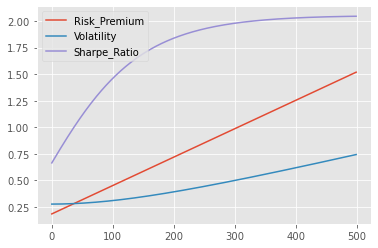

In [87]:
base_tickers = ['ASX','AGG']
var_ticker   =['TSLA']
start_date   = '1-1-2020'
end_date     = '1-1-2022'
base_weights = [.6,.4]
n = 500

var_weight_plot(base_tickers,var_ticker,base_weights,start_date,end_date,n)

In [88]:
https://api.tiingo.com/tiingo/crypto/top?tickers=<ticker>

SyntaxError: invalid syntax (<ipython-input-88-8badd4a90cd3>, line 1)